In [2]:
data_root = "https://raw.githubusercontent.com/kmerkl22/k-s-ISL/main/Data/"
image_root = "https://github.com/kmerkl22/k-s-ISL/raw/main/Images/"

In [3]:
pip install -r https://raw.githubusercontent.com/intro-stat-learning/ISLP_labs/v2/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached lifelines-0.28.0-py3-none-any.whl.metadata (3.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ISLP-0.3.22-py3-none-any.whl.metadata (7.0 kB)
  Using cached autograd-1.6.2-py3-none-any.whl.metadata (706 bytes)
  Using cached autograd-gamma-0.5.0.tar.gz (4.0 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached formulaic-1.0.1-py3-none-any.whl.metadata (6.1 kB)
     ━━━━━━━━━━━━━━━━━━━━

In [4]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.


In [5]:
 # imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import seaborn as sns
sns.set_style("whitegrid")

## Problem 14

In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

### Part a

Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:

In [6]:
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [7]:
Auto['mpg01']= np.where(Auto['mpg'] > Auto['mpg'].median(), 1, 0)

In [8]:
Auto.head()

/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [9]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
 9   mpg01         392 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 30.8+ KB


### Part b

Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

In [10]:
Auto['mpg01'].value_counts().sort_index().plot(kind = 'barh')

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

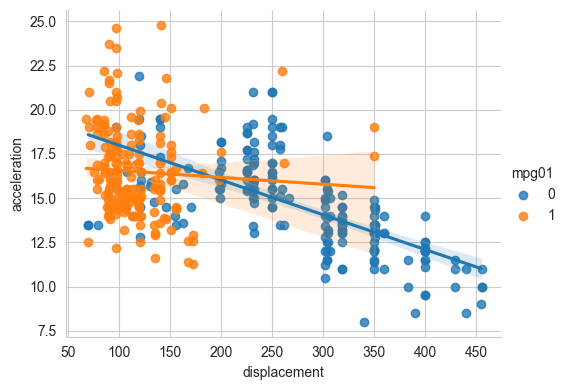

In [11]:
sns.lmplot(data=Auto,
              x='displacement',
              y='acceleration',
              hue='mpg01',
              height=4,
              aspect=1.3)

plt.show()

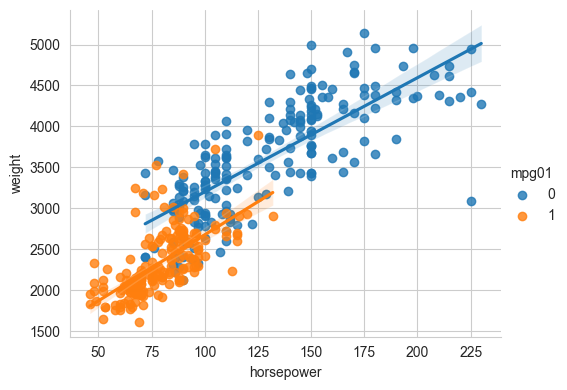

In [12]:
sns.lmplot(data=Auto,
              x='horsepower',
              y='weight',
              hue='mpg01',
              height=4,
              aspect=1.3)

plt.show()

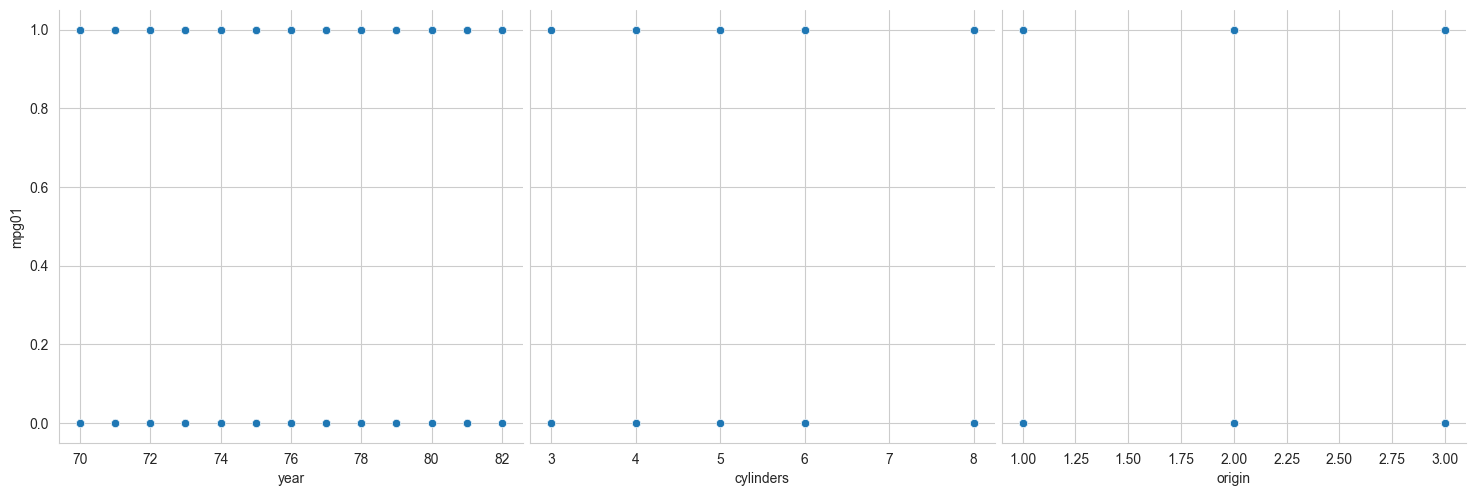

In [13]:
sns.pairplot(Auto,
                y_vars = "mpg01",
                x_vars = ["year","cylinders","origin"],
                height = 5)


plt.show()

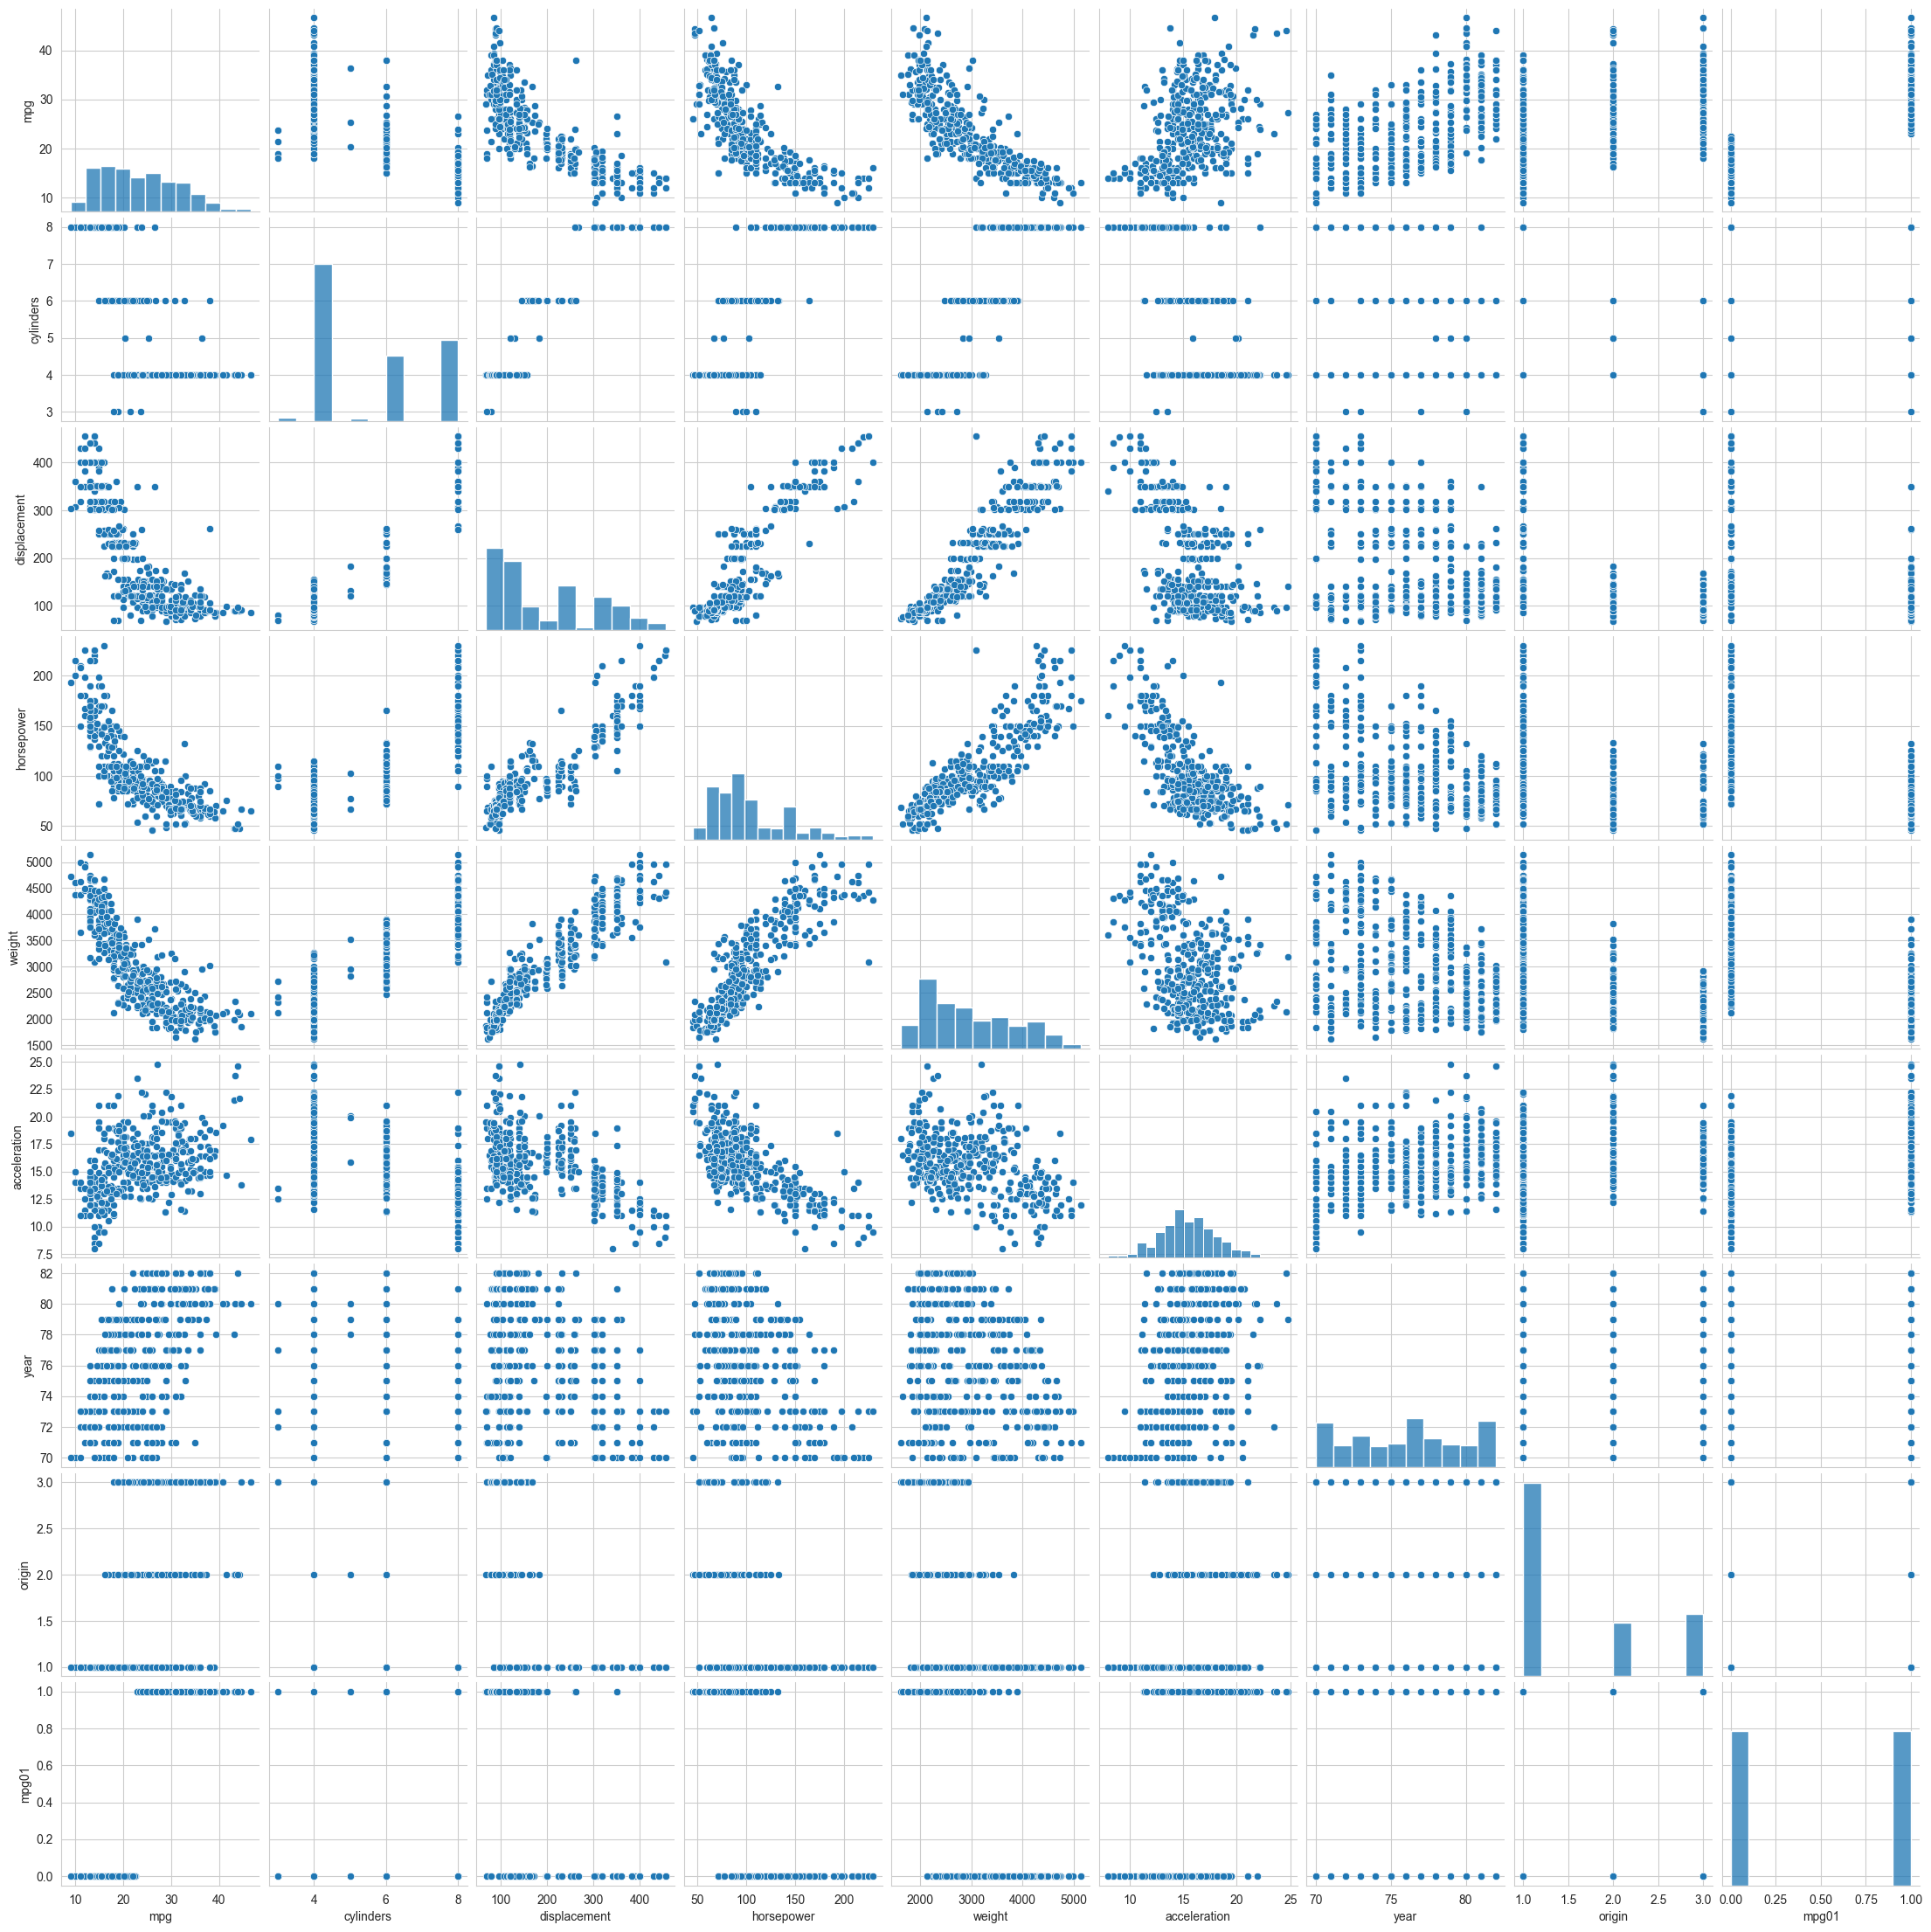

In [14]:
sns.pairplot(Auto)

In [15]:
Auto[['mpg01',"year","cylinders","origin"]].corr()

/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,mpg01,year,cylinders,origin
mpg01,1.000000,0.429904,-0.759194,0.513698
year,0.429904,1.000000,-0.345647,0.181528
cylinders,-0.759194,-0.345647,1.000000,-0.568932
origin,0.513698,0.181528,-0.568932,1.000000


Looks to me like weight, horsepower, and displacement are the best to consider. Maybe cylinders also?

### Part c

Split the data into a training set and a test set.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
significant_columns = [ 'year', 'cylinders', 'displacement', 'horsepower', 'weight', 'mpg01']

In [18]:
significant_df = Auto.loc[:, significant_columns]
print(significant_df.shape)
significant_df.head()

(392, 6)


/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,year,cylinders,displacement,horsepower,weight,mpg01
0,70,8,307.0,130,3504,0
1,70,8,350.0,165,3693,0
2,70,8,318.0,150,3436,0
3,70,8,304.0,150,3433,0
4,70,8,302.0,140,3449,0


In [19]:
feature_df= significant_df.drop(columns = ['mpg01'])
response = significant_df.mpg01

X_train, X_test, y_train, y_test = train_test_split(feature_df, response, 
                                            test_size=.2,
                                            random_state=365,
                                            shuffle=True)

### Part d

Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [20]:
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)

In [21]:
lda = LDA(store_covariance=True)

In [22]:
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
print(np.mean(lda_pred ==y_test))
confusion_matrix(lda_pred,y_test)

0.9113924050632911


array([[38,  1],
       [ 6, 34]])

### Part e

Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [25]:
qda= QDA(store_covariance= True)
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)

In [26]:
print(np.mean(qda_pred == y_test))
confusion_matrix(qda_pred, y_test)

0.8734177215189873


array([[38,  4],
       [ 6, 31]])

### Part f

Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [27]:
significant_predictors = significant_columns.copy()
significant_predictors.remove('mpg01')

In [28]:
X_train

/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,year,cylinders,displacement,horsepower,weight
152,75,6,250.0,72,3432
254,78,6,225.0,100,3430
281,79,6,232.0,90,3265
13,70,8,455.0,225,3086
175,75,4,115.0,95,2694
...,...,...,...,...,...
261,78,6,231.0,165,3445
347,81,4,98.0,65,2045
289,79,8,267.0,125,3605
180,76,4,107.0,86,2464


In [29]:
train = X_train.index

In [30]:
allvars = pd.Index(significant_predictors, dtype = 'object')
design = MS(allvars)

X = design.fit_transform(Auto)
y = Auto.mpg01 == 1

X_train, X_test = X.iloc[train], X.iloc[~train]
y_train, y_test = y.iloc[train], y.iloc[~train]

glm_train = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog = X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ISLP/models/columns.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


In [31]:
log_pred = np.array([0]*len(y_test))
log_pred[probs >0.5] = 1

print(np.mean(log_pred == y_test))
confusion_matrix(log_pred, y_test)

0.8913738019169329


array([[144,  15],
       [ 19, 135]])

### Part g

Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
X_train, X_test = [M.drop(columuns = ['intercept']) for M in [X_train, X_test]]

TypeError: DataFrame.drop() got an unexpected keyword argument 'columuns'

In [34]:
NB = GaussianNB()
NB.fit(X_train, y_train)
nb_labels = NB.predict(X_test)

In [35]:
print(np.mean(nb_labels == y_test))
confusion_matrix(nb_labels, y_test)

0.9009584664536742


array([[143,  11],
       [ 20, 139]])

### Part h

Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
K_neighborhood = [1,2,3,4,5,6,7,8,9,10]
knn_predictions = []

In [38]:
for k in K_neighborhood:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)


In [39]:
for k in K_neighborhood:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)


In [40]:
print(k)
print(confusion_matrix(knn_pred, y_test))

10
[[141  12]
 [ 22 138]]


In [41]:
knn_predictions.append(np.mean(knn_pred == y_test))

In [42]:
knn_predictions

[0.8913738019169329]

### Problem 15

This problem involves writing functions.

#### Part a

Write a function, Power(), that prints out the result of raising 2 to the 3rd power. In other words, your function should compute 23 and print out the results.

In [43]:
def Power():
    print(2**3)

In [44]:
Power()

8


#### Part b

Create a new function, Power2(), that allows you to pass any two numbers, x and a, and prints out the value of x**a. 

In [45]:
def Power2(x,a):
    print(x**a)

In [46]:
Power2(3,2)

9


In [47]:
Power2(3,8)

6561


#### Part d

Now create a new function, Power3(), that actually returns the
result x**a as a Python object, rather than simply printing it
to the screen. That is, if you store the value x**a in an object
called result within your function, 

In [48]:
def Power3(x,a):
    result = (x**a)
    return result

In [49]:
Power3(3,8)
Power2(2,8)

256


#### Part e

Now using the Power3() function, create a plot of f(x) = x2. The x-axis should display a range of integers from 1 to 10, and the y-axis should display x2. Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the x-axis, the y-axis, or both on the log-scale. You can do this by using the ax.set_xscale() and ax.set_yscale() methods of the axes you are plotting to.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat

In [51]:
x=np.arange(1,11)

In [52]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [53]:
y=Power3(x,2)

In [54]:
(x,y)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100]))

Text(0.5, 1.0, 'x squared versus x')

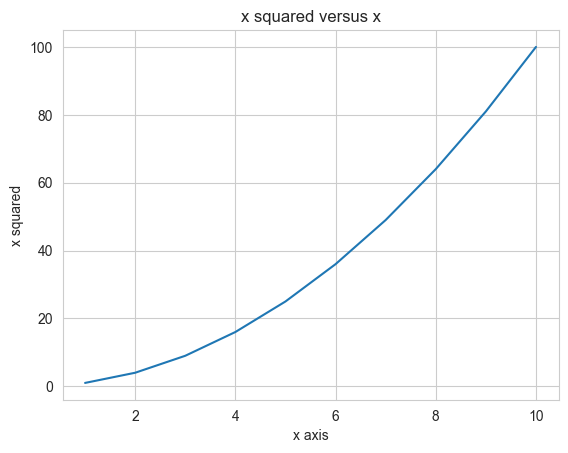

In [55]:
plt.plot(x,y)
plt.xlabel('x axis')
plt.ylabel('x squared')
plt.title('x squared versus x')

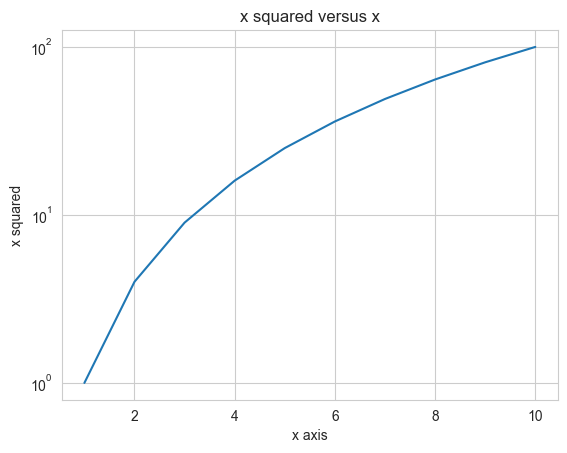

In [56]:
plt.plot(x,y)
plt.xlabel('x axis')
plt.ylabel('x squared')
plt.title('x squared versus x')
ax = plt.gca()
ax.set_yscale('log')

#### Part f

Create a function, PlotPower(), that allows you to create a plot of x against x**a for a fixed a and a sequence of values of x.

In [57]:
def PlotPower(x,n):
    y=Power3(x,n)
    plt.plot(x,y)
    plt.xlabel('x axis')
    plt.ylabel('x to the {}'.format(n))
    plt.title('x to the {} versus x'.format(n))


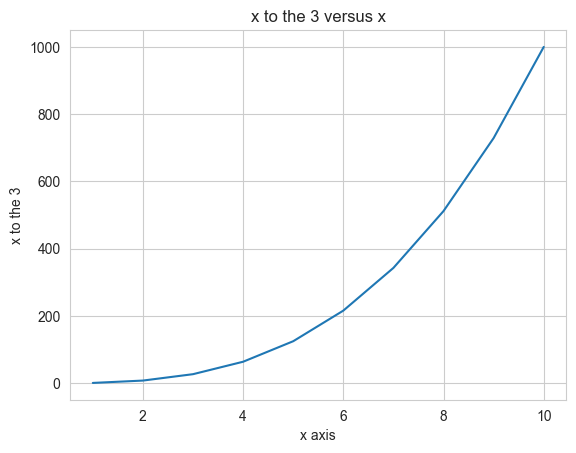

In [58]:
PlotPower(np.arange(1,11),3)

## Problem 16

Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, naive Bayes, and KNN models using various subsets of the predictors. Describe your findings.

    Hint: You will have to create the response variable yourself, using the variables that are contained in the Boston data set.

In [59]:
Boston = load_data("Boston")
Boston.head()

/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [60]:
(Boston.crim > Boston.crim.median())

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: crim, Length: 506, dtype: bool

In [69]:
Boston['zeros'] = (Boston.crim > Boston.crim.median()).astype(int)

In [70]:
Boston.head()

/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,zeros
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0


In [71]:
Boston.corr()

/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,zeros
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,0.608741


Perhaps we take the predictors over .5 correlation, so indus, nox, age, dis, rad, and tax as our predictors.

In [74]:
crimdf=Boston[['indus','nox','age', 'dis', 'rad', 'tax', 'zeros']].copy()

In [75]:
crimdf.head()

/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,indus,nox,age,dis,rad,tax,zeros
0,2.31,0.538,65.2,4.0900,1,296,0
1,7.07,0.469,78.9,4.9671,2,242,0
2,7.07,0.469,61.1,4.9671,2,242,0
3,2.18,0.458,45.8,6.0622,3,222,0
4,2.18,0.458,54.2,6.0622,3,222,0


In [76]:
crimdf.corr()

/Users/katherine/Library/Python/3.12/lib/python/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,indus,nox,age,dis,rad,tax,zeros
indus,1.000000,0.763651,0.644779,-0.708027,0.595129,0.720760,0.603260
nox,0.763651,1.000000,0.731470,-0.769230,0.611441,0.668023,0.723235
age,0.644779,0.731470,1.000000,-0.747881,0.456022,0.506456,0.613940
dis,-0.708027,-0.769230,-0.747881,1.000000,-0.494588,-0.534432,-0.616342
rad,0.595129,0.611441,0.456022,-0.494588,1.000000,0.910228,0.619786
tax,0.720760,0.668023,0.506456,-0.534432,0.910228,1.000000,0.608741
zeros,0.603260,0.723235,0.613940,-0.616342,0.619786,0.608741,1.000000


#### Logistic Regression:

In [77]:
feature_df= crimdf.drop(columns = ['zeros'])
response = crimdf.zeros

X_train, X_test, y_train, y_test = train_test_split(feature_df, response, 
                                            test_size=.2,
                                            random_state=365,
                                            shuffle=True)

In [85]:
significant_columns = [ 'age', 'indus', 'nox', 'dis', 'rad', 'tax']

In [86]:
allvars = pd.Index(significant_columns, dtype = 'object')
design = MS(allvars)

X = design.fit_transform(crimdf)
y = crimdf.zeros == 1

X_train, X_test = X.iloc[train], X.iloc[~train]
y_train, y_test = y.iloc[train], y.iloc[~train]

glm_train = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog = X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ISLP/models/columns.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


In [87]:
log_pred = np.array([0]*len(y_test))
log_pred[probs >0.5] = 1

print(np.mean(log_pred == y_test))
confusion_matrix(log_pred, y_test)

0.8849840255591054


array([[106,  10],
       [ 26, 171]])

#### LDA:

In [78]:
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

In [79]:
print(np.mean(lda_pred ==y_test))
confusion_matrix(lda_pred,y_test)

0.7941176470588235


array([[39, 16],
       [ 5, 42]])

#### Naive Bayes

In [88]:
NB = GaussianNB()
NB.fit(X_train, y_train)
nb_labels = NB.predict(X_test)

In [89]:
print(np.mean(nb_labels == y_test))
confusion_matrix(nb_labels, y_test)

0.8370607028753994


array([[108,  27],
       [ 24, 154]])

#### KNN Models

In [91]:
K_neighborhood = [1,2,3,4,5,6,7,8,9,10]
knn_predictions = []

In [92]:
for k in K_neighborhood:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)


In [93]:
print(k)
print(confusion_matrix(knn_pred, y_test))

10
[[115  16]
 [ 17 165]]


In [94]:
knn_predictions.append(np.mean(knn_pred == y_test))

In [95]:
knn_predictions

[0.8945686900958466]

In [100]:
rng = np.random.default_rng(10) 
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, replace=True) == 4)  >0
np.mean(store)

0.0089